In [1]:
from tensorflow.compat.v1 import ConfigProto, InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.compat.v1.disable_eager_execution()

import matplotlib.pyplot as plt

In [2]:
#basic cnn
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
classifier.add(Dropout(0.5))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 10, activation = 'softmax'))

#Model Summary
classifier.summary()

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('./Dataset/train/', # relative path from working directoy
                                                 target_size = (128, 128),
                                                 batch_size = 6, class_mode = 'categorical')
valid_set = test_datagen.flow_from_directory('./Dataset/val/', # relative path from working directoy
                                             target_size = (128, 128), 
                                        batch_size = 3, class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(
        './Dataset/test/',
        target_size = (128, 128),
        class_mode = 'categorical',
        color_mode = "rgb"
)

labels = (training_set.class_indices)
print(labels)

history = classifier.fit(training_set,
                         epochs = 35,
                         validation_data=valid_set
                         )


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0

C:\Users\LUCIFER\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


24/24 [==============================] - 10s 345ms/step - batch: 11.5000 - size: 5.9583 - loss: 3.0092 - accuracy: 0.0769 - val_loss: 2.3008 - val_accuracy: 0.2308
Epoch 2/35
24/24 [==============================] - 7s 311ms/step - batch: 11.5000 - size: 5.9583 - loss: 2.2951 - accuracy: 0.1608 - val_loss: 2.2965 - val_accuracy: 0.1923
Epoch 3/35
24/24 [==============================] - 8s 319ms/step - batch: 11.5000 - size: 5.9583 - loss: 2.1839 - accuracy: 0.1608 - val_loss: 2.1937 - val_accuracy: 0.2692
Epoch 4/35
24/24 [==============================] - 7s 305ms/step - batch: 11.5000 - size: 5.9583 - loss: 2.0192 - accuracy: 0.2657 - val_loss: 2.1010 - val_accuracy: 0.3462
Epoch 5/35
24/24 [==============================] - 7s 301ms/step - batch: 11.5000 - size: 5.9583 - loss: 1.8682 - accuracy: 0.3077 - val_loss: 2.1334 - val_accuracy: 0.1923
Epoch 6/35
24/24 [==============================] - 7s 282ms/step - batch: 11.5000 - size: 5.9583 - loss: 1.7906 - accuracy: 0.4266 - val_lo

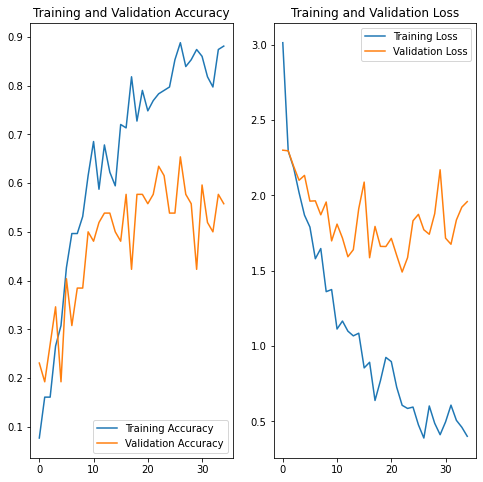

[INFO] Calculating model accuracy
Test Loss: 1.9590960161553488
Test Accuracy: 55.7692289352417


In [3]:
# plot the train and val curve for accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(35), acc, label='Training Accuracy')
plt.plot(range(35), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(35), loss, label='Training Loss')
plt.plot(range(35), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

valid_set.reset()

# Evaluate on Validation data
#Calculate Model Accuracy
print("[INFO] Calculating model accuracy")
scores = classifier.evaluate(valid_set)
print(f"Test Loss: {scores[0]}")
print(f"Test Accuracy: {scores[1]*100}")

In [4]:
#saved model using h5 
classifier_json=classifier.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(classifier_json)
# serialize weights to HDF5
    classifier.save_weights("my_model_weights.h5")
    classifier.save("model.h5")
    print("Saved model to disk")

Saved model to disk
